In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math


In [2]:
from polymer_MD_analysis import (pers_length, get_rg_pers_poly, bavg_pers_cnt, pos_bead_autocorr_RA,
                                 rouse_relax, zimm_relax_fit, zimm_relax_func, rh_block_avg, mean_sq_e2e, hydro_rad_poly,
                                orientation_order_param)

In [3]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [4]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import polymer, distances, rdf
import matplotlib.font_manager as font_manager

## PEG/water systems analysis

### N = 6

In [5]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n6_peg_wat = mda.Universe("n6peg_prod/n6pegonly.pdb", "n6peg_prod/nowat_n6peg.xtc")

In [6]:
n6_peg_wat.trajectory

<XTCReader n6peg_prod/nowat_n6peg.xtc with 18001 frames of 45 atoms>

In [7]:
len(n6_peg_wat.trajectory)

18001

In [8]:
#Select the polymer heavy atoms 
peg_n6 = n6_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")

In [9]:
np.unique(peg_n6.resids)

array([1, 2, 3, 4, 5, 6])

In [10]:
# Get cosine theta values at frame 0
crv_n6peg = pers_length(peg_n6,6)
crv_n6peg

array([[ 1.        ,  0.99378211,  0.99457237,  0.98859888,  0.98142095],
       [ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 0.        ,  0.        ,  0.        ,  8.66014075, 11.06175726]])

### Orientation Order parameter vs. time 

In [11]:
n_mon = 6 
start = 0
end = 18000

In [12]:
OOp_n6pegwat = orientation_order_param(peg_n6, n6_peg_wat, n_mon, start, end)

In [13]:
OOp_n6pegwat.shape

(18000,)

(0, 1)

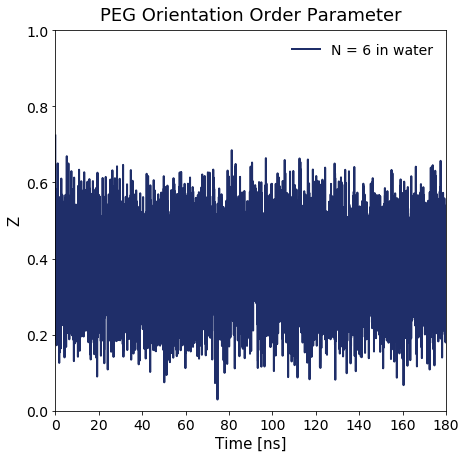

In [14]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6pegwat,linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,1)

#### Mean Orientation Order Parameter for N = 6 PEG in water

In [15]:
np.mean(OOp_n6pegwat)

0.384831886792427

In [52]:
np.std(OOp_n6pegwat)

0.09082217420389185

### Mean squared end to end distance 

In [16]:
eVec_n6pegwat, e2edis_n6pegwat = mean_sq_e2e(peg_n6, n6_peg_wat, n_mon, start, end)

(0, 2)

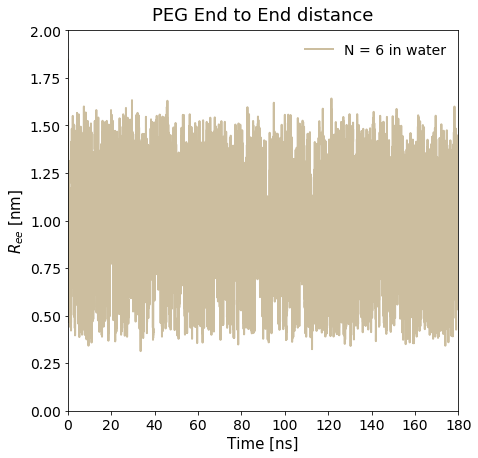

In [17]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6pegwat[1]/10,linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,2)

### Hydrodynamic Radius vs time

In [18]:
pegn6wat_rh = hydro_rad_poly(peg_n6, n6_peg_wat, n_mon, start, end)

(0, 2)

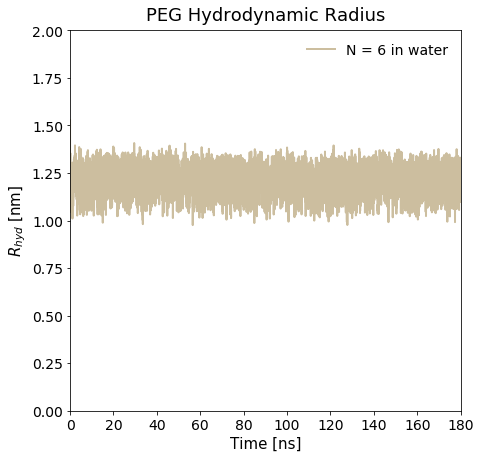

In [19]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, pegn6wat_rh/10,linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,2)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n_mon = 6 
start = 0
end = 18000
t_corr = 1000
window_shift = 10

In [ ]:
s_time = timeit.default_timer()
tcRA_pegn6wat, tcSUM_pegn6wat = pos_bead_autocorr_RA(peg_n6, n6_peg_wat, n_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_pegn6wat

In [ ]:
tcSUM_pegn6wat.shape

### Fitting autocorrelation data 

In [ ]:
tcRA_pegn6wat = np.load('n6pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn8wat = np.load('n8pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn10wat = np.load('n10pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn20wat = np.load('n20pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn30wat = np.load('n30pegWAT_Ct_RA.npy', allow_pickle=True)

In [ ]:
xdata_pegn6wat = tcRA_pegn6wat[1]/100
ydata_pegn6wat = tcRA_pegn6wat[0]

In [ ]:
ydata_pegn6wat.shape

In [ ]:
xdata_pegn6wat.shape

In [ ]:
s_n6 =[2 for i in range(len(xdata_pegn6wat))]
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_pegn6wat[1]/100, tcRA_pegn6wat[0], color='#1F2E69', s=s_n6)
plt.title(r'Positional bead autocorrelation PEG in water', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,30)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

In [ ]:
rouse_relax(1, 2, 6)

In [ ]:
zimm_relax_fit(1, 2, 0.1, 5)

In [ ]:
zimm_relax_func(1, 2, 0.1, 5)

In [ ]:
def res_polyn6wat(variabls, xnp, ynp):
    hs_np = variabls['h_star']
    tr1_np = variabls['t_first']
    n_bonds = 5
    testnp = []
    for i in range(len(xnp)):
        model_ynp = zimm_relax_fit(xnp[i], tr1_np, hs_np, n_bonds)
        #model_ynp = rouse_relax(xnp[i], tr1_np, n_m)
        testnp.append(ynp[i] - model_ynp)
    
    tt_n30 = np.array(testnp)

    return tt_n30
    
#x1 = np.array([0,0])
#pfit, pcov, infodict, errmsg, success = leastsq(res_poly, x1, args=(xdata, ydata), full_output=1)

In [ ]:
from lmfit import Minimizer, Parameters, report_fit

In [ ]:
pfit_n6wat = Parameters()
pfit_n6wat.add(name='h_star', value=0, min=0, max=0.26, vary=True)
pfit_n6wat.add(name='t_first', value=2)

In [ ]:
mini_n6wat = Minimizer(res_polyn6wat, pfit_n6wat, fcn_args=(xdata_pegn6wat, ydata_pegn6wat))
out_n6wat = mini_n6wat.leastsq()
#bfit_n10 = ydata_n10ace + out_n10ace.residual 

In [ ]:
report_fit(out_n6wat.params)

In [ ]:
out_n6wat.params

In [ ]:
twat_n6plga = []
n_bonds = 5
for i in range(len(xdata_pegn6wat)):
    twat_n6plga.append(zimm_relax_fit(xdata_pegn6wat[i], 0.635, 0.0016,  5))


In [ ]:
t_c, tz_n6pegwat, ai_n6pegwat = zimm_relax_func(1, 0.635, 0.0016, 5)

In [ ]:
x_pos = np.arange(5)
aa_types = [r"$\tau_{1}$", r"$\tau_{2}$", r"$\tau_{3}$", r"$\tau_{4}$", r"$\tau_{5}$"]
fig = plt.figure(figsize=(7,7))
plt.bar(x_pos, tz_n6pegwat, ecolor='black',capsize=5, color='c')
plt.xticks(x_pos, labels=aa_types, fontsize=12)
plt.ylabel(r'Relaxation times', fontsize=15)

In [ ]:
x_pos = np.arange(5)
aa_types = [r"$a_{1}$", r"$a_{2}$", r"$a_{3}$", r"$a_{4}$", r"$a_{5}$"]
fig = plt.figure(figsize=(7,7))
plt.bar(x_pos, ai_n6pegwat, ecolor='black',capsize=5, color='c')
plt.xticks(x_pos, labels=aa_types, fontsize=12)
plt.ylabel(r'Zimm eigenvalues', fontsize=15)

In [ ]:
s_n6 =[2 for i in range(len(xdata_pegn6dmso))]
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_pegn6wat[1]/100, tcRA_pegn6wat[0], color='#1F2E69', s=s_n6)
plt.plot(tcRA_pegn6wat[1]/100, twat_n6plga, color='#1F2E69')
plt.title(r'Positional bead autocorrelation PEG in water', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,30)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

### Radius of Gyration vs. time N = 6 PEG/water

In [20]:
n6peg_rgens, cor_n6peg, N6peg_cos, rgavg_n6peg = get_rg_pers_poly(peg_n6, n6_peg_wat, 0, 18000)

In [21]:
n6peg_rgens[0].shape

(18000,)

In [ ]:
cor_n6peg[3]

In [ ]:
N6peg_cos

In [ ]:
rgavg_n6peg

In [ ]:
np.std(n6peg_rgens)

(0.2, 2)

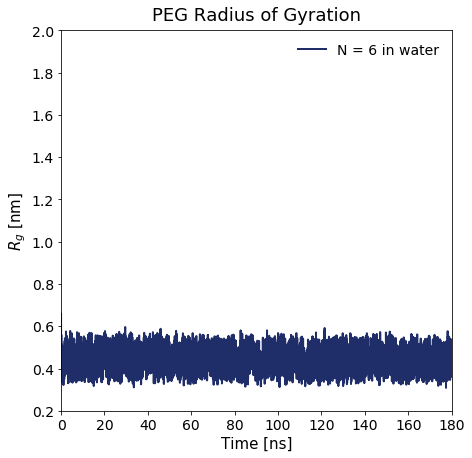

In [22]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Get average COM distance from res 1 to res 2

In [23]:
com_bond_wat = np.zeros(shape=(1,18000))
count = 0
for ts in n6_peg_wat.trajectory[0:18000]:
    n6_mon1 = n6_peg_wat.select_atoms("resid 1")
    n6_mon2 = n6_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n6_mon1.center_of_mass(), n6_mon2.center_of_mass(), 
                                                   box=n6_peg_wat.trajectory.ts.dimensions)
    com_bond_wat[0, count] = oo_len
    count += 1
    

In [24]:
com_bond_wat

array([[3.62684519, 3.32616194, 3.18436942, ..., 3.19787102, 3.21162118,
        3.35360062]])

In [25]:
lb_avg_pwn6 = np.mean(com_bond_wat)
lb_avg_pwn6

3.2416426844376756

In [26]:
np.std(com_bond_wat)

0.15150696554795434

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 6 PEG/water 

In [27]:
# x values
blen = cor_n6peg[3]*lb_avg_pwn6
#nt_tt[0] = 0
blen

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074])

In [ ]:
mk_n6p = cor_n6peg[1]/cor_n6peg[0]
mk_n6p

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')

In [29]:
# All the points give the best fits for N = 6 peg in water
n6_blkspeg , n6peg_fitslp = bavg_pers_cnt(5, peg_n6, n6_peg_wat, lb_avg_pwn6, 5, 0 , 18000)

0
3600
Lp [Angstroms]: 15.353975918762506
Error in Lp from fit [Angstroms], 95% CL: 4.166575260711779
R2 score: 0.9621103209638046
3600
7200
Lp [Angstroms]: 16.694207436732203
Error in Lp from fit [Angstroms], 95% CL: 3.328083425706519
R2 score: 0.9782632867104954
7200
10800
Lp [Angstroms]: 14.538072069115271
Error in Lp from fit [Angstroms], 95% CL: 3.916316355876061
R2 score: 0.9626096689286909
10800
14400
Lp [Angstroms]: 15.77845257028716
Error in Lp from fit [Angstroms], 95% CL: 3.224352194721344
R2 score: 0.9772140074144235
14400
18000
Lp [Angstroms]: 14.99626307270105
Error in Lp from fit [Angstroms], 95% CL: 3.622943589737119
R2 score: 0.9692515396471404
0
3600
3600
7200
7200
10800
10800
14400
14400
18000


In [30]:
n6_blkspeg

{'Avg Hydrodynamic radius': array([12.144365934226856, 12.136782766621998, 12.07600783345832,
        12.052153346912906, 12.079693660003047], dtype=object),
 'Avg Radius of gyration': array([4.50667253, 4.4890123 , 4.42922781, 4.42146354, 4.42236589]),
 'Avg Sq. radius of gyration': array([20.31009729, 20.15123146, 19.618059  , 19.54933984, 19.55732009]),
 'Avg end to end distance': array([10.50994836, 10.46118314, 10.11839885, 10.12804363, 10.08675248]),
 'Avg Sq. end to end distance': array([110.45901454, 109.43635262, 102.3819952 , 102.57726769,
        101.7425755 ]),
 'Avg persistence length': array([15.35397592, 16.69420744, 14.53807207, 15.77845257, 14.99626307])}

In [31]:
n6peg_fitslp

array([[ 1.53539759e+01,  1.66942074e+01,  1.45380721e+01,
         1.57784526e+01,  1.49962631e+01],
       [ 4.16657526e+00,  3.32808343e+00,  3.91631636e+00,
         3.22435219e+00,  3.62294359e+00],
       [-6.51297101e-02, -5.99010168e-02, -6.87849115e-02,
        -6.33775711e-02, -6.66832794e-02],
       [ 4.25821067e-03,  1.94391508e-03,  4.68037192e-03,
         2.28654322e-03,  3.53787956e-03]])

In [ ]:
n6peg_fitslp[2]

In [ ]:
np.mean(n6peg_fitslp[3])

#### line fitted to cosine theta values using mean slope

In [32]:
def line_fit(slope, x):
    return slope*x 

In [33]:
blen

array([ 0.        ,  3.24164268,  6.48328537,  9.72492805, 12.96657074])

In [34]:
gg_n6peg = line_fit(np.mean(n6peg_fitslp[2]),blen)

In [35]:
gg_n6peg

array([-0.        , -0.20997837, -0.41995674, -0.62993511, -0.83991348])

### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 6 PEG/water

In [36]:
# Contour Length, N = 6 PEG in DMSO
lc_n6pw = lb_avg_pwn6*(n_mon-1)
lc_n6pw

16.20821342218838

In [37]:
# Ree^2/Rg^2 array at different contour lengths
ree_rhyd_pegwat = np.zeros(shape=(2,5))
ree_rhyd_pegwat[1,0] = lc_n6pw
ree_rhyd_pegwat

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.20821342,  0.        ,  0.        ,  0.        ,  0.        ]])

In [38]:
a_n6 = np.mean(n6_blkspeg['Avg Sq. end to end distance'])

In [39]:
b_n6 = np.mean(n6_blkspeg['Avg Sq. radius of gyration'])

In [40]:
ree_rhyd_pegwat[0,0] = a_n6/b_n6
ree_rhyd_pegwat

array([[ 5.3091863 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.20821342,  0.        ,  0.        ,  0.        ,  0.        ]])

In [41]:
# Rg/Rh array at different contour lengths 
rhy_rg_pegwat = np.zeros(shape=(2,5))
rhy_rg_pegwat[1,0] = lc_n6pw
rhy_rg_pegwat

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.20821342,  0.        ,  0.        ,  0.        ,  0.        ]])

In [42]:
aa_n6 = np.mean(n6_blkspeg['Avg Radius of gyration'])

In [43]:
bb_n6 = np.mean(n6_blkspeg['Avg Hydrodynamic radius'])

In [44]:
rhy_rg_pegwat[0,0] = aa_n6/bb_n6
rhy_rg_pegwat

array([[ 0.3681453 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.20821342,  0.        ,  0.        ,  0.        ,  0.        ]])

In [45]:
# Kuhn length array at different monomer lengths
kuhnlpL_pegwat = np.zeros(shape=(3,5))
kuhnlpL_pegwat[2] = np.array([6,8,10,20,30])
kuhnlpL_pegwat

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 6.,  8., 10., 20., 30.]])

In [46]:
kuhnlpL_pegwat[0,0] = a_n6/lc_n6pw
kuhnlpL_pegwat

array([[ 6.49790562,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

In [47]:
# pers length/contour length 
kuhnlpL_pegwat[1,0] = np.mean(n6_blkspeg["Avg persistence length"])/lc_n6pw
kuhnlpL_pegwat

array([[ 6.49790562,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.95458974,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

### Block averaged Radius of gyration and persistence length, N = 6 PEG/water

In [48]:
np.mean(n6_blkspeg["Avg persistence length"])

15.472194213519638

In [49]:
np.std(n6_blkspeg["Avg persistence length"])

0.7348715119637015

In [50]:
np.mean(n6_blkspeg["Avg Radius of gyration"])

4.453748415394843

In [51]:
np.std(n6_blkspeg["Avg Radius of gyration"])

0.03653201190498238

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='b', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen, gg_n6peg, color='b')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
#plt.ylim(-1.9,0)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.legend([r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$'], loc=3, frameon=0, fontsize=14, prop=font)
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [ ]:
rgpeg_olig =  pd.DataFrame(data=n6_blkspeg["Avg Radius of gyration"], columns=[r"$R_{g}$ [Angstrom] N = 6 PEG "])
rgpeg_olig

In [ ]:
pers_pegt = pd.DataFrame(data=n6_blkspeg["Avg persistence length"], columns=[r"$L_{p}$ [Angstrom] N = 6 PEG "])
pers_pegt

### N = 8 PEG/water 

In [53]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n8_peg_wat = mda.Universe("n8peg_prod/n8pegonly.pdb", "n8peg_prod/nowat_n8peg.xtc")

In [54]:
n8_peg_wat.trajectory

<XTCReader n8peg_prod/nowat_n8peg.xtc with 18001 frames of 59 atoms>

In [55]:
len(n8_peg_wat.trajectory)

18001

In [56]:
#Select the polymer heavy atoms 
peg_n8 = n8_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
#list(peg_n8)

In [57]:
np.unique(peg_n8.resids)

array([1, 2, 3, 4, 5, 6, 7, 8])

### Orientation Order parameter vs. time 

In [59]:
n8_mon = 8 
start = 0
end = 18000

In [60]:
OOp_n8pegwat = orientation_order_param(peg_n8, n8_peg_wat, n8_mon, start, end)

In [61]:
OOp_n8pegwat.shape

(18000,)

(0, 1)

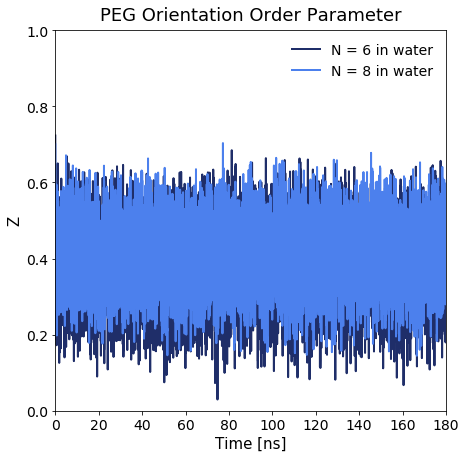

In [64]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6pegwat,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, OOp_n8pegwat,linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,1)

#### Mean Orientation Order Parameter for N = 8 PEG in water

In [65]:
np.mean(OOp_n8pegwat)

0.4169190090124139

In [66]:
np.std(OOp_n8pegwat)

0.07946967688468354

### Mean squared end to end distance 

In [68]:
eVec_n8pegwat, e2edis_n8pegwat = mean_sq_e2e(peg_n8, n8_peg_wat, n8_mon, start, end)

(0, 5)

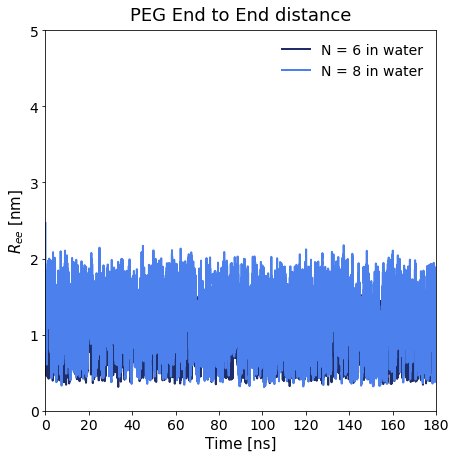

In [72]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6pegwat[1]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, e2edis_n8pegwat[1]/10,linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,5)

### Hydrodynamic Radius vs time

In [74]:
pegn8wat_rh = hydro_rad_poly(peg_n8, n8_peg_wat, n8_mon, start, end)

(0, 2)

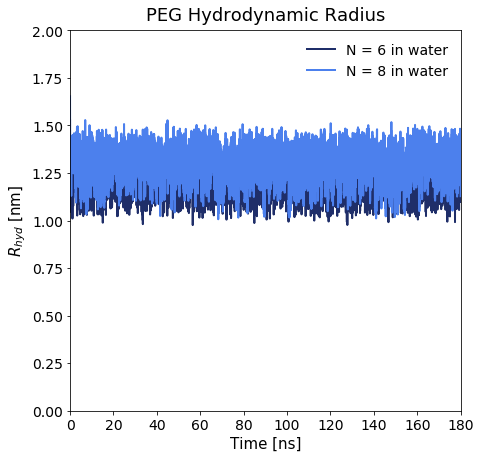

In [75]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, pegn6wat_rh/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, pegn8wat_rh/10,linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,2)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n8_mon = 8 
start = 0
end = 18000
t_corr = 1000
window_shift = 10

In [ ]:
s_time = timeit.default_timer()
tcRA_pegn8wat, tcSUM_pegn8wat = pos_bead_autocorr_RA(peg_n8, n8_peg_wat, n8_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_pegn8ace

In [ ]:
tcSUM_pegn8ace.shape

### Fitting autocorrelation data 

In [ ]:
xdata_pegn8wat = tcRA_pegn8wat[1]/100
ydata_pegn8wat = tcRA_pegn8wat[0]

In [ ]:
ydata_pegn8wat.shape

In [ ]:
xdata_pegn8wat.shape

In [ ]:
s_n8 =[4 for i in range(len(xdata_pegn8wat))]
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_pegn6wat[1]/100, tcRA_pegn6wat[0], color='#1F2E69', s=s_n8)
plt.scatter(tcRA_pegn8wat[1]/100, tcRA_pegn8wat[0], color='#4C80ED', s=s_n8)
plt.title(r'Positional bead autocorrelation PEG in water', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,4.5)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

### Radius of Gyration vs. time N = 8 PEG/water

In [76]:
n8peg_rgens, cor_n8peg, N8peg_cos, rgavg_n8peg = get_rg_pers_poly(peg_n8, n8_peg_wat, 0, 18000)

In [77]:
n8peg_rgens[0].shape

(18000,)

In [ ]:
cor_n8peg[3]

In [ ]:
N8peg_cos

In [ ]:
rgavg_n8peg

In [ ]:
np.std(n8peg_rgens)

(0.2, 2)

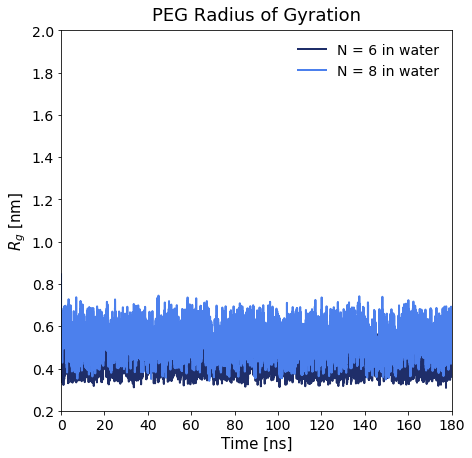

In [78]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Get average COM distance from res 1 to res 2

In [79]:
com_bond_n8 = np.zeros(shape=(1,18000))
count = 0
for ts in n8_peg_wat.trajectory[0:18000]:
    n8_mon1 = n8_peg_wat.select_atoms("resid 1")
    n8_mon2 = n8_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n8_mon1.center_of_mass(), n8_mon2.center_of_mass(), 
                                                   box=n8_peg_wat.trajectory.ts.dimensions)
    com_bond_n8[0, count] = oo_len
    count += 1
    

In [80]:
lb_avg_pwn6

3.2416426844376756

In [81]:
lb_avg_pwn8 = np.mean(com_bond_n8)
lb_avg_pwn8

3.2432765017892087

In [82]:
np.std(com_bond_n8)

0.1511749370479925

#### Correlation values at each arc length for the whole 180 ns trajectory, N = 8 PEG/water 

In [83]:
# x values
blen_n8 = cor_n8peg[3]*lb_avg_pwn8
#nt_tt[0] = 0
blen_n8

array([ 0.        ,  3.2432765 ,  6.486553  ,  9.72982951, 12.97310601,
       16.21638251, 19.45965901])

In [84]:
mk_n8p = cor_n8peg[1]/cor_n8peg[0]
mk_n8p

array([3.70444231e-17, 2.65054465e-02, 1.10225506e-01, 2.85640352e-01,
       5.42142210e-01, 8.59463794e-01, 1.25659664e+00])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water'], frameon=False, fontsize=14)

In [86]:
# All the points give the best fits for N = 6 peg in water
n8_blkspeg , n8peg_fitslp = bavg_pers_cnt(5, peg_n8, n8_peg_wat, lb_avg_pwn8, 5, 0 , 18000)

0
3600
Lp [Angstroms]: 19.023541302499467
Error in Lp from fit [Angstroms], 95% CL : 1.5492345487073442
R2 score: 0.9866899273603952
3600
7200
Lp [Angstroms]: 17.67762979150835
Error in Lp from fit [Angstroms], 95% CL : 1.7334667205923933
R2 score: 0.9813097671400772
7200
10800
Lp [Angstroms]: 16.962932527685286
Error in Lp from fit [Angstroms], 95% CL : 1.6852842214009989
R2 score: 0.9808230910872785
10800
14400
Lp [Angstroms]: 17.550774693832583
Error in Lp from fit [Angstroms], 95% CL : 1.7873609907788024
R2 score: 0.9799930535522146
14400
18000
Lp [Angstroms]: 17.230644337081298
Error in Lp from fit [Angstroms], 95% CL : 1.714827654181882
R2 score: 0.9807721530181912
0
3600
3600
7200
7200
10800
10800
14400
14400
18000


In [87]:
n8_blkspeg

{'Avg Hydrodynamic radius': array([13.054328890027014, 12.93262036302398, 12.810035319264436,
        12.92735512887835, 12.889632107813613], dtype=object),
 'Avg Radius of gyration': array([5.42267318, 5.33700556, 5.23359656, 5.32962682, 5.30218916]),
 'Avg Sq. radius of gyration': array([29.40538441, 28.48362835, 27.39053296, 28.40492202, 28.11320993]),
 'Avg end to end distance': array([13.05593872, 12.63817885, 12.19240816, 12.55480559, 12.5169869 ]),
 'Avg Sq. end to end distance': array([170.45753576, 159.72356462, 148.65481682, 157.62314346,
        156.67496114]),
 'Avg persistence length': array([19.0235413 , 17.67762979, 16.96293253, 17.55077469, 17.23064434])}

In [88]:
n8peg_fitslp

array([[ 1.90235413e+01,  1.76776298e+01,  1.69629325e+01,
         1.75507747e+01,  1.72306443e+01],
       [ 1.54923455e+00,  1.73346672e+00,  1.68528422e+00,
         1.78736099e+00,  1.71482765e+00],
       [-5.25664483e-02, -5.65686697e-02, -5.89520708e-02,
        -5.69775419e-02, -5.80361349e-02],
       [ 8.75239073e-04,  1.46957817e-03,  1.63832623e-03,
         1.60804130e-03,  1.59328218e-03]])

In [ ]:
n8peg_fitslp[2]

In [ ]:
np.mean(n8peg_fitslp[3])

#### line fitted to cosine theta values using mean slope

In [89]:
blen_n8

array([ 0.        ,  3.2432765 ,  6.486553  ,  9.72982951, 12.97310601,
       16.21638251, 19.45965901])

In [90]:
gg_n6peg_n8 = line_fit(np.mean(n6peg_fitslp[2]),blen_n8)
gg_n6peg_n8

array([-0.        , -0.2100842 , -0.4201684 , -0.6302526 , -0.8403368 ,
       -1.05042101, -1.26050521])

In [91]:
gg_n8peg = line_fit(np.mean(n8peg_fitslp[2]),blen_n8)

In [92]:
gg_n8peg

array([-0.        , -0.18363488, -0.36726975, -0.55090463, -0.73453951,
       -0.91817439, -1.10180926])

### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 8 PEG/water

In [94]:
# Contour Length, N = 6 PEG in DMSO
lc_n8pw = lb_avg_pwn8*(n8_mon-1)
lc_n8pw

22.702935512524462

In [95]:
# Ree^2/Rg^2 array at different contour lengths
ree_rhyd_pegwat[1,1] = lc_n8pw
ree_rhyd_pegwat

array([[ 5.3091863 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.20821342, 22.70293551,  0.        ,  0.        ,  0.        ]])

In [96]:
a_n8 = np.mean(n8_blkspeg['Avg Sq. end to end distance'])

In [97]:
b_n8 = np.mean(n8_blkspeg['Avg Sq. radius of gyration'])

In [98]:
ree_rhyd_pegwat[0,1] = a_n8/b_n8
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  0.        ,  0.        ,  0.        ],
       [16.20821342, 22.70293551,  0.        ,  0.        ,  0.        ]])

In [99]:
# Rg/Rh array at different contour lengths 
rhy_rg_pegwat[1,1] = lc_n8pw
rhy_rg_pegwat

array([[ 0.3681453 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [16.20821342, 22.70293551,  0.        ,  0.        ,  0.        ]])

In [100]:
aa_n8 = np.mean(n8_blkspeg['Avg Radius of gyration'])

In [101]:
bb_n8 = np.mean(n8_blkspeg['Avg Hydrodynamic radius'])

In [102]:
rhy_rg_pegwat[0,1] = aa_n8/bb_n8
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.        ,  0.        ,  0.        ],
       [16.20821342, 22.70293551,  0.        ,  0.        ,  0.        ]])

In [103]:
kuhnlpL_pegwat[0,1] = a_n8/lc_n8pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  0.        ,  0.        ,  0.        ],
       [ 0.95458974,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

In [104]:
# pers length/contour length 
kuhnlpL_pegwat[1,1] = np.mean(n8_blkspeg["Avg persistence length"])/lc_n8pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  0.        ,  0.        ,  0.        ],
       [ 0.95458974,  0.77915495,  0.        ,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

### Block averaged Radius of gyration and persistence length, N = 8 PEG/water

In [105]:
np.mean(n8_blkspeg["Avg persistence length"])

17.689104530521398

In [106]:
np.std(n8_blkspeg["Avg persistence length"])

0.7123903197592124

In [107]:
np.mean(n8_blkspeg["Avg Radius of gyration"])

5.3250182563121715

In [108]:
np.std(n8_blkspeg["Avg Radius of gyration"])

0.0609598426606824

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n8, gg_n6peg_n8, color='#1F2E69')
plt.plot(blen_n8, gg_n8peg, color='#4C80ED')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,25)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [ ]:
rgpeg_olig

In [ ]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 8 PEG "] = n8_blkspeg["Avg Radius of gyration"]
rgpeg_olig

In [ ]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 8 PEG "] = n8_blkspeg["Avg persistence length"]
pers_pegt

### N = 10 PEG/water

In [109]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n10_peg_wat = mda.Universe("n10peg_prod/n10pegonly.pdb", "n10peg_prod/nowat_n10peg.xtc")

In [110]:
n10_peg_wat.trajectory

<XTCReader n10peg_prod/nowat_n10peg.xtc with 18001 frames of 73 atoms>

In [111]:
len(n10_peg_wat.trajectory)

18001

In [112]:
#Select the polymer heavy atoms 
peg_n10 = n10_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
#list(peg_n10)

In [113]:
np.unique(peg_n10.resids)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Orientation Order parameter vs. time 

In [114]:
n10_mon = 10 
start = 0
end = 18000

In [115]:
OOp_n10pegwat = orientation_order_param(peg_n10, n10_peg_wat, n10_mon, start, end)

In [116]:
OOp_n10pegwat.shape

(18000,)

(0, 1)

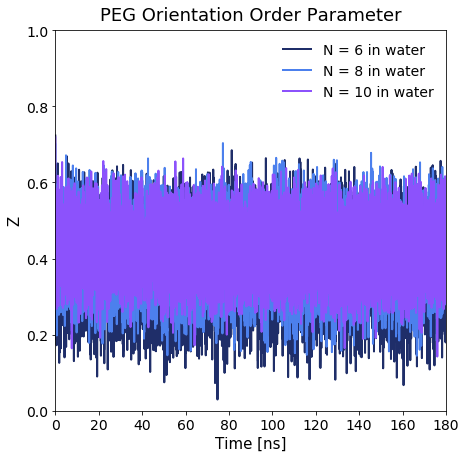

In [117]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6pegwat,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, OOp_n8pegwat,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, OOp_n10pegwat,linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,1)

#### Mean Orientation Order Parameter for N = 10 PEG in water

In [118]:
np.mean(OOp_n10pegwat)

0.42912616935069026

In [119]:
np.std(OOp_n10pegwat)

0.06957775890900687

### Mean squared end to end distance 

In [120]:
eVec_n10pegwat, e2edis_n10pegwat = mean_sq_e2e(peg_n10, n10_peg_wat, n10_mon, start, end)

(0, 5)

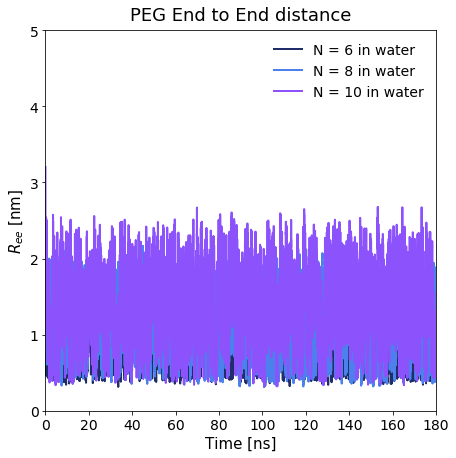

In [121]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6pegwat[1]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, e2edis_n8pegwat[1]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, e2edis_n10pegwat[1]/10,linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,5)

### Hydrodynamic Radius vs time

In [122]:
pegn10wat_rh = hydro_rad_poly(peg_n10, n10_peg_wat, n10_mon, start, end)

(0, 2)

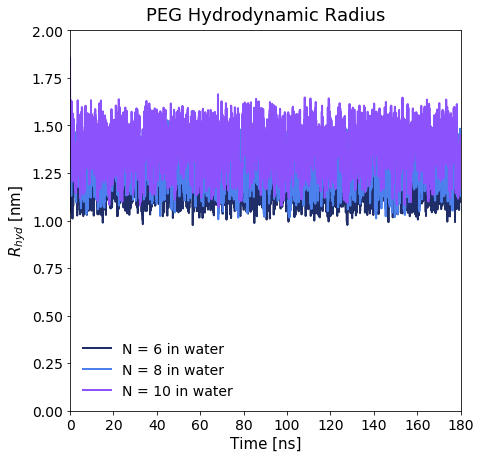

In [123]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, pegn6wat_rh/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, pegn8wat_rh/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, pegn10wat_rh/10,linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,2)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n10_mon = 10
start = 0
end = 18000
t_corr = 1000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_pegn10wat, tcSUM_pegn10wat = pos_bead_autocorr_RA(peg_n10, n10_peg_wat, n10_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_pegn10wat

In [ ]:
tcSUM_pegn10wat.shape

### Fitting autocorrelation data 

In [ ]:
xdata_pegn10wat = tcRA_pegn10wat[1]/100
ydata_pegn10wat = tcRA_pegn10wat[0]

In [ ]:
ydata_pegn10wat.shape

In [ ]:
xdata_pegn10wat.shape

In [ ]:
s_n10 =[4 for i in range(len(xdata_pegn10wat))]
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_pegn6wat[1]/100, tcRA_pegn6wat[0], color='#1F2E69', s=s_n8)
plt.scatter(tcRA_pegn8wat[1]/100, tcRA_pegn8wat[0], color='#4C80ED', s=s_n8)
plt.scatter(tcRA_pegn10wat[1]/100, tcRA_pegn10wat[0], color='#8C52FC', s=s_n10)
plt.title(r'Positional bead autocorrelation PEG in water', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,30)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

### Radius of Gyration vs. time, N = 10 PEG/water

In [124]:
n10peg_rgens, cor_n10peg, N10peg_cos, rgavg_n10peg = get_rg_pers_poly(peg_n10, n10_peg_wat, 0, 18000)

In [125]:
n10peg_rgens[0].shape

(18000,)

In [ ]:
cor_n10peg[3]

In [ ]:
N10peg_cos

In [ ]:
rgavg_n10peg

In [ ]:
np.std(n10peg_rgens)

(0.2, 2)

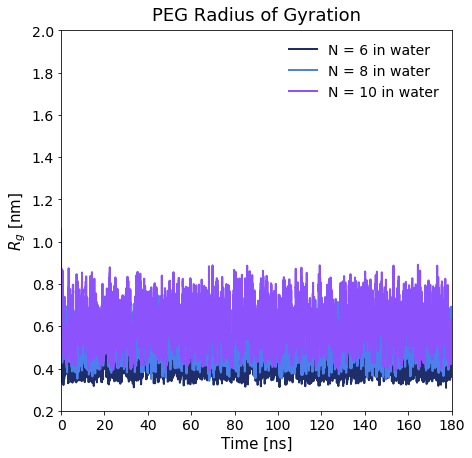

In [126]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens[0]/10,linewidth=2, color='#8C52FC')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,2)

#### Get average COM distance from res 1 to res 2

In [127]:
com_bond_n10 = np.zeros(shape=(1,18000))
count = 0
for ts in n10_peg_wat.trajectory[0:18000]:
    n10_mon1 = n10_peg_wat.select_atoms("resid 1")
    n10_mon2 = n10_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n10_mon1.center_of_mass(), n10_mon2.center_of_mass(), 
                                                   box=n10_peg_wat.trajectory.ts.dimensions)
    com_bond_n10[0, count] = oo_len
    count += 1
    

In [128]:
lb_avg_pwn6

3.2416426844376756

In [129]:
lb_avg_pwn8

3.2432765017892087

In [130]:
lb_avg_pwn10 = np.mean(com_bond_n10)
lb_avg_pwn10

3.2415557268808546

In [131]:
np.std(com_bond_n10)

0.15329762765990188


#### Correlation values at each arc length for the whole 180 ns trajectory

In [132]:
# x values
blen_n10 = cor_n10peg[3]*lb_avg_pwn8
#nt_tt[0] = 0
blen_n10

array([ 0.        ,  3.2432765 ,  6.486553  ,  9.72982951, 12.97310601,
       16.21638251, 19.45965901, 22.70293551, 25.94621201])

In [ ]:
mk_n10p = cor_n10peg[1]/cor_n10peg[0]
mk_n10p

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water'], frameon=False, fontsize=14)

In [133]:
# All the points give the best fits for N = 10 peg in water, first 6 points 
n10_blkspeg , n10peg_fitslp = bavg_pers_cnt(5, peg_n10, n10_peg_wat, lb_avg_pwn10, 6, 0 , 18000)

0
3600
Lp [Angstroms]: 18.318964880364117
Error in Lp from fit [Angstroms], 95% CL : 1.099875795650972
R2 score: 0.9861961915078383
3600
7200
Lp [Angstroms]: 19.595540128490526
Error in Lp from fit [Angstroms], 95% CL : 1.108131762843652
R2 score: 0.9875280840862726
7200
10800
Lp [Angstroms]: 18.252470174484788
Error in Lp from fit [Angstroms], 95% CL : 0.9879863649988933
R2 score: 0.9890718504524842
10800
14400
Lp [Angstroms]: 19.532446150937343
Error in Lp from fit [Angstroms], 95% CL : 1.0719829311795397
R2 score: 0.9883007385047846
14400
18000
Lp [Angstroms]: 19.361018169957944
Error in Lp from fit [Angstroms], 95% CL : 1.0444529661320707
R2 score: 0.9887192996234394
0
3600
3600
7200
7200
10800
10800
14400
14400
18000


In [134]:
n10_blkspeg

{'Avg Hydrodynamic radius': array([13.708324988255184, 13.8330594041935, 13.787475124102437,
        13.890318054059192, 13.82837940081992], dtype=object),
 'Avg Radius of gyration': array([6.04408109, 6.11653546, 6.13392141, 6.21497158, 6.1425236 ]),
 'Avg Sq. radius of gyration': array([36.5309162 , 37.41200608, 37.62499186, 38.62587171, 37.73059622]),
 'Avg end to end distance': array([14.40785543, 14.74863166, 14.63583383, 15.12088846, 14.88167653]),
 'Avg Sq. end to end distance': array([207.58629799, 217.52213584, 214.20763178, 228.64126792,
        221.46429622]),
 'Avg persistence length': array([18.31896488, 19.59554013, 18.25247017, 19.53244615, 19.36101817])}

In [135]:
n10peg_fitslp

array([[ 1.83189649e+01,  1.95955401e+01,  1.82524702e+01,
         1.95324462e+01,  1.93610182e+01],
       [ 1.09987580e+00,  1.10813176e+00,  9.87986365e-01,
         1.07198293e+00,  1.04445297e+00],
       [-5.45882372e-02, -5.10320202e-02, -5.47871050e-02,
        -5.11968646e-02, -5.16501762e-02],
       [ 1.37079568e-03,  1.06277911e-03,  1.12228839e-03,
         1.00748446e-03,  9.90727370e-04]])

In [ ]:
n10peg_fitslp[2]

In [ ]:
np.mean(n10peg_fitslp[3])

#### line fitted to cosine theta values using mean slope

In [136]:
blen_n10

array([ 0.        ,  3.2432765 ,  6.486553  ,  9.72982951, 12.97310601,
       16.21638251, 19.45965901, 22.70293551, 25.94621201])

In [137]:
gg_n6peg_n10 = line_fit(np.mean(n6peg_fitslp[2]),blen_n10)
gg_n6peg_n10

array([-0.        , -0.2100842 , -0.4201684 , -0.6302526 , -0.8403368 ,
       -1.05042101, -1.26050521, -1.47058941, -1.68067361])

In [138]:
gg_n8peg_n10 = line_fit(np.mean(n8peg_fitslp[2]),blen_n10)
gg_n8peg_n10

array([-0.        , -0.18363488, -0.36726975, -0.55090463, -0.73453951,
       -0.91817439, -1.10180926, -1.28544414, -1.46907902])

In [139]:
gg_n10peg = line_fit(np.mean(n10peg_fitslp[2]),blen_n10)

### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 10 PEG/water

In [140]:
# Contour Length, N = 10 PEG in DMSO
lc_n10pw = lb_avg_pwn10*(n10_mon-1)
lc_n10pw

29.17400154192769

In [141]:
# Ree^2/Rg^2 array at different contour lengths
ree_rhyd_pegwat[1,2] = lc_n10pw
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  0.        ,  0.        ,  0.        ],
       [16.20821342, 22.70293551, 29.17400154,  0.        ,  0.        ]])

In [142]:
a_n10 = np.mean(n10_blkspeg['Avg Sq. end to end distance'])

In [143]:
b_n10 = np.mean(n10_blkspeg['Avg Sq. radius of gyration'])

In [144]:
ree_rhyd_pegwat[0,2] = a_n10/b_n10
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  5.79712764,  0.        ,  0.        ],
       [16.20821342, 22.70293551, 29.17400154,  0.        ,  0.        ]])

In [146]:
# Rg/Rh array at different contour lengths 
rhy_rg_pegwat[1,2] = lc_n10pw
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.        ,  0.        ,  0.        ],
       [16.20821342, 22.70293551, 29.17400154,  0.        ,  0.        ]])

In [147]:
aa_n10 = np.mean(n10_blkspeg['Avg Radius of gyration'])

In [148]:
bb_n10 = np.mean(n10_blkspeg['Avg Hydrodynamic radius'])

In [149]:
rhy_rg_pegwat[0,2] = aa_n10/bb_n10
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.4439264 ,  0.        ,  0.        ],
       [16.20821342, 22.70293551, 29.17400154,  0.        ,  0.        ]])

In [150]:
kuhnlpL_pegwat[0,2] = a_n10/lc_n10pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  7.46844157,  0.        ,  0.        ],
       [ 0.95458974,  0.77915495,  0.        ,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

In [151]:
# pers length/contour length 
kuhnlpL_pegwat[1,2] = np.mean(n10_blkspeg["Avg persistence length"])/lc_n10pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  7.46844157,  0.        ,  0.        ],
       [ 0.95458974,  0.77915495,  0.65167913,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

### Block averaged Radius of gyration and persistence length 

In [152]:
np.mean(n10_blkspeg["Avg persistence length"])

19.012087900846943

In [153]:
np.std(n10_blkspeg["Avg persistence length"])

0.5983945445620513

In [154]:
np.mean(n10_blkspeg["Avg Radius of gyration"])

6.130406628383843

In [155]:
np.std(n10_blkspeg["Avg Radius of gyration"])

0.05468987742587079

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n10, gg_n6peg_n10, color='#1F2E69')
plt.plot(blen_n10, gg_n8peg_n10, color='#4C80ED')
plt.plot(blen_n10, gg_n10peg, color='#4C80ED')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,30)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 19.1 $\AA$ ± 0.56 $\AA$', fontsize=15, color='#8C52FC')
plt.tick_params(labelsize=14)
#plt.text(5,-0.15,r'R$^{2}$ = 0.98', fontsize=15, color='blue')

In [ ]:
rgpeg_olig

In [ ]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 10 PEG "] = n10_blkspeg["Avg Radius of gyration"]
rgpeg_olig

In [ ]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 10 PEG "] = n10_blkspeg["Avg persistence length"]
pers_pegt

### N = 20 PEG/water

In [156]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n20_peg_wat = mda.Universe("n20peg_prod/n20pegonly.pdb", "n20peg_prod/nowat_n20peg.xtc")

In [157]:
n20_peg_wat.trajectory

<XTCReader n20peg_prod/nowat_n20peg.xtc with 18001 frames of 143 atoms>

In [158]:
len(n20_peg_wat.trajectory)

18001

In [159]:
#Select the polymer heavy atoms 
peg_n20 = n20_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
#list(peg_n20)

In [161]:
np.unique(peg_n20.resids)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

### Orientation Order parameter vs. time 

In [162]:
n20_mon = 20 
start = 0
end = 18000

In [163]:
OOp_n20pegwat = orientation_order_param(peg_n20, n20_peg_wat, n20_mon, start, end)

In [164]:
OOp_n20pegwat.shape

(18000,)

(0, 1)

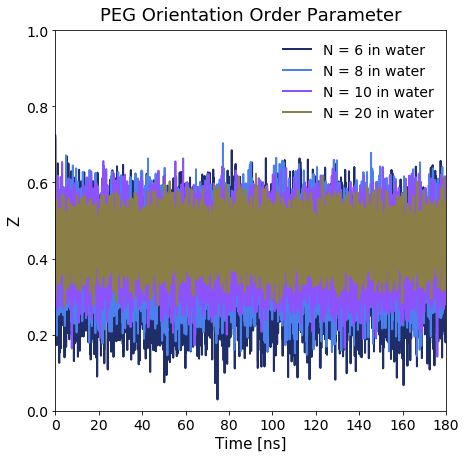

In [165]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6pegwat,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, OOp_n8pegwat,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, OOp_n10pegwat,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, OOp_n20pegwat,linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water','N = 20 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,1)

#### Mean Orientation Order Parameter for N = 20 PEG in water

In [166]:
np.mean(OOp_n20pegwat)

0.4460933403814682

In [167]:
np.std(OOp_n20pegwat)

0.045978559718149514

### Mean squared end to end distance 

In [168]:
eVec_n20pegwat, e2edis_n20pegwat = mean_sq_e2e(peg_n20, n20_peg_wat, n20_mon, start, end)

(0, 7)

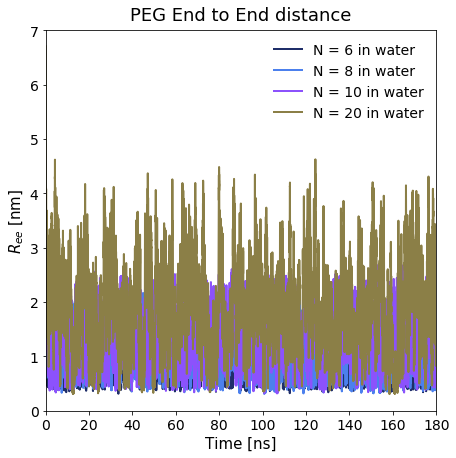

In [207]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6pegwat[1]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, e2edis_n8pegwat[1]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, e2edis_n10pegwat[1]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, e2edis_n20pegwat[1]/10,linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water','N = 20 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,7)

### Hydrodynamic Radius vs time

In [170]:
pegn20wat_rh = hydro_rad_poly(peg_n20, n20_peg_wat, n20_mon, start, end)

(0, 4)

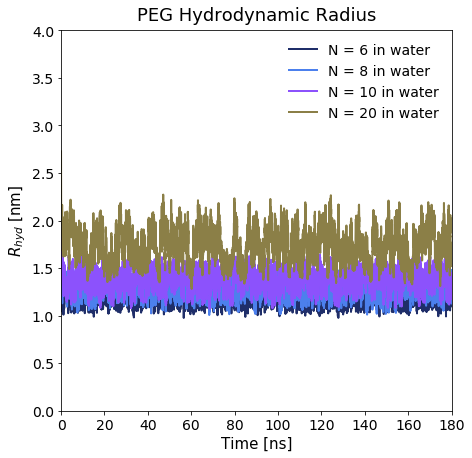

In [209]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, pegn6wat_rh/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, pegn8wat_rh/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, pegn10wat_rh/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, pegn20wat_rh/10,linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water','N = 20 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,4)

### Radius of Gyration vs. time, N = 20 PEG/water

In [172]:
n20peg_rgens, cor_n20peg, N20peg_cos, rgavg_n20peg = get_rg_pers_poly(peg_n20, n20_peg_wat, 0, 18000)

In [173]:
n20peg_rgens[0].shape

(18000,)

In [ ]:
cor_n20peg[3]

In [ ]:
N20peg_cos

In [ ]:
rgavg_n20peg

In [ ]:
np.std(n20peg_rgens)

(0.2, 3)

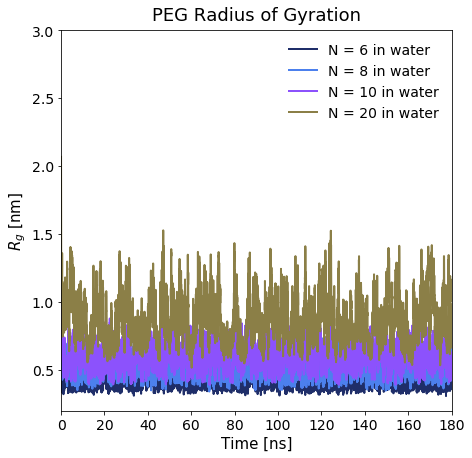

In [174]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens[0]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, n20peg_rgens[0]/10,linewidth=2, color='#8B7F47')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water','N = 20 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)

#### Get average COM distance from res 1 to res 2

In [175]:
com_bond_n20 = np.zeros(shape=(1,18000))
count = 0
for ts in n20_peg_wat.trajectory[0:18000]:
    n20_mon1 = n20_peg_wat.select_atoms("resid 1")
    n20_mon2 = n20_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n20_mon1.center_of_mass(), n20_mon2.center_of_mass(), 
                                                   box=n20_peg_wat.trajectory.ts.dimensions)
    com_bond_n20[0, count] = oo_len
    count += 1
    

In [176]:
np.mean(com_bond_n20)

3.2421872911182366

In [177]:
np.std(com_bond_n20)

0.15352193811305248

In [178]:
lb_avg_pwn6

3.2416426844376756

In [179]:
lb_avg_pwn8

3.2432765017892087

In [180]:
lb_avg_pwn10

3.2415557268808546

In [181]:
lb_avg_pwn20 = np.mean(com_bond_n20)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n20_mon = 20
start = 0
end = 18000
t_corr = 1500
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_pegn20wat, tcSUM_pegn20wat = pos_bead_autocorr_RA(peg_n20, n20_peg_wat, n20_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_pegn20wat

In [ ]:
tcSUM_pegn20wat.shape

### Fitting autocorrelation data 

In [ ]:
xdata_pegn20wat = tcRA_pegn20wat[1]/100
ydata_pegn20wat = tcRA_pegn20wat[0]

In [ ]:
ydata_pegn20wat.shape

In [ ]:
xdata_pegn20wat.shape

In [ ]:
s_n20 =[4 for i in range(len(xdata_pegn20wat))]
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_pegn6wat[1]/100, tcRA_pegn6wat[0], color='#1F2E69', s=s_n8)
plt.scatter(tcRA_pegn8wat[1]/100, tcRA_pegn8wat[0], color='#4C80ED', s=s_n8)
plt.scatter(tcRA_pegn10wat[1]/100, tcRA_pegn10wat[0], color='#8C52FC', s=s_n10)
plt.scatter(tcRA_pegn20wat[1]/100, tcRA_pegn20wat[0], color='#8B7F47', s=s_n20)
plt.title(r'Positional bead autocorrelation PEG in water', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
#plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True)
plt.xlim(0,30)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)


#### Correlation values at each arc length for the whole 180 ns trajectory

In [182]:
# x values
blen_n20 = cor_n20peg[3]*lb_avg_pwn20
#nt_tt[0] = 0
blen_n20

array([ 0.        ,  3.24218729,  6.48437458,  9.72656187, 12.96874916,
       16.21093646, 19.45312375, 22.69531104, 25.93749833, 29.17968562,
       32.42187291, 35.6640602 , 38.90624749, 42.14843478, 45.39062208,
       48.63280937, 51.87499666, 55.11718395, 58.35937124])

In [183]:
mk_n20p = cor_n20peg[1]/cor_n20peg[0]
mk_n20p

array([2.04044911e-17, 1.45322468e-02, 5.57373413e-02, 1.30657543e-01,
       2.15010837e-01, 2.90121680e-01, 3.62228059e-01, 4.38115784e-01,
       5.34423266e-01, 6.51212387e-01, 7.80420411e-01, 9.17797075e-01,
       1.04957739e+00, 1.17926385e+00, 1.31121289e+00, 1.49237731e+00,
       1.71314048e+00, 1.98000229e+00, 2.23019205e+00])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water', 'N = 20 in water'], frameon=False, fontsize=14)

In [184]:
# All the points give the best fits for N = 10 peg in water, first 6 points 
n20_blkspeg , n20peg_fitslp = bavg_pers_cnt(5, peg_n20, n20_peg_wat, lb_avg_pwn20, 6, 0 , 18000)

0
3600
Lp [Angstroms]: 19.033913264006316
Error in Lp from fit [Angstroms], 95% CL : 0.2483776240875334
R2 score: 0.9889303224724293
3600
7200
Lp [Angstroms]: 19.56584943854171
Error in Lp from fit [Angstroms], 95% CL : 0.25161028634626315
R2 score: 0.9891968166647603
7200
10800
Lp [Angstroms]: 18.65667689120372
Error in Lp from fit [Angstroms], 95% CL : 0.2511789998257947
R2 score: 0.988389092421338
10800
14400
Lp [Angstroms]: 19.129281368133427
Error in Lp from fit [Angstroms], 95% CL : 0.24536965128531035
R2 score: 0.9893028789977577
14400
18000
Lp [Angstroms]: 18.483640881891027
Error in Lp from fit [Angstroms], 95% CL : 0.2630601549681981
R2 score: 0.9868091539332343
0
3600
3600
7200
7200
10800
10800
14400
14400
18000


In [185]:
n20_blkspeg

{'Avg Hydrodynamic radius': array([17.278021214499272, 17.3025855817614, 16.95155762080958,
        17.03190538393057, 17.241015176797344], dtype=object),
 'Avg Radius of gyration': array([8.94586629, 8.9093992 , 8.60129772, 8.67687642, 8.96060271]),
 'Avg Sq. radius of gyration': array([80.02852372, 79.37739418, 73.98232241, 75.28818449, 80.29240089]),
 'Avg end to end distance': array([21.50787816, 20.81032976, 20.29424002, 19.92157688, 21.225534  ]),
 'Avg Sq. end to end distance': array([462.58882304, 433.06982469, 411.85617791, 396.86922551,
        450.52329354]),
 'Avg persistence length': array([19.03391326, 19.56584944, 18.65667689, 19.12928137, 18.48364088])}

In [186]:
n20peg_fitslp

array([[ 1.90339133e+01,  1.95658494e+01,  1.86566769e+01,
         1.91292814e+01,  1.84836409e+01],
       [ 2.48377624e-01,  2.51610286e-01,  2.51179000e-01,
         2.45369651e-01,  2.63060155e-01],
       [-5.25378038e-02, -5.11094600e-02, -5.36001136e-02,
        -5.22758791e-02, -5.41018951e-02],
       [ 1.02640173e-03,  9.43336712e-04,  1.13719325e-03,
         9.81865165e-04,  1.29468715e-03]])

In [ ]:
n20peg_fitslp[2]

In [ ]:
np.mean(n20peg_fitslp[3])

#### line fitted to cosine theta values using mean slope

In [187]:
blen_n20

array([ 0.        ,  3.24218729,  6.48437458,  9.72656187, 12.96874916,
       16.21093646, 19.45312375, 22.69531104, 25.93749833, 29.17968562,
       32.42187291, 35.6640602 , 38.90624749, 42.14843478, 45.39062208,
       48.63280937, 51.87499666, 55.11718395, 58.35937124])

In [188]:
gg_n6peg_n20 = line_fit(np.mean(n6peg_fitslp[2]),blen_n20)
gg_n6peg_n20

array([-0.        , -0.21001365, -0.42002729, -0.63004094, -0.84005459,
       -1.05006824, -1.26008188, -1.47009553, -1.68010918, -1.89012282,
       -2.10013647, -2.31015012, -2.52016377, -2.73017741, -2.94019106,
       -3.15020471, -3.36021835, -3.570232  , -3.78024565])

In [189]:
gg_n8peg_n20 = line_fit(np.mean(n8peg_fitslp[2]),blen_n20)
gg_n8peg_n20

array([-0.        , -0.18357321, -0.36714641, -0.55071962, -0.73429282,
       -0.91786603, -1.10143923, -1.28501244, -1.46858565, -1.65215885,
       -1.83573206, -2.01930526, -2.20287847, -2.38645167, -2.57002488,
       -2.75359809, -2.93717129, -3.1207445 , -3.3043177 ])

In [190]:
gg_n10peg_n20 = line_fit(np.mean(n10peg_fitslp[2]),blen_n20)
gg_n10peg_n20

array([-0.        , -0.17070402, -0.34140803, -0.51211205, -0.68281606,
       -0.85352008, -1.0242241 , -1.19492811, -1.36563213, -1.53633614,
       -1.70704016, -1.87774418, -2.04844819, -2.21915221, -2.38985622,
       -2.56056024, -2.73126426, -2.90196827, -3.07267229])

In [191]:
gg_n20peg = line_fit(np.mean(n20peg_fitslp[2]),blen_n20)

### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 20 PEG/water

In [192]:
# Contour Length, N = 10 PEG in DMSO
lc_n20pw = lb_avg_pwn20*(n20_mon-1)
lc_n20pw

61.601558531246496

In [193]:
# Ree^2/Rg^2 array at different contour lengths
ree_rhyd_pegwat[1,3] = lc_n20pw
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  5.79712764,  0.        ,  0.        ],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853,  0.        ]])

In [194]:
a_n20 = np.mean(n20_blkspeg['Avg Sq. end to end distance'])

In [195]:
b_n20 = np.mean(n20_blkspeg['Avg Sq. radius of gyration'])

In [196]:
ree_rhyd_pegwat[0,3] = a_n20/b_n20
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  5.79712764,  5.54005155,  0.        ],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853,  0.        ]])

In [197]:
# Rg/Rh array at different contour lengths 
rhy_rg_pegwat[1,3] = lc_n20pw
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.4439264 ,  0.        ,  0.        ],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853,  0.        ]])

In [198]:
aa_n20 = np.mean(n20_blkspeg['Avg Radius of gyration'])

In [199]:
bb_n20 = np.mean(n20_blkspeg['Avg Hydrodynamic radius'])

In [200]:
rhy_rg_pegwat[0,3] = aa_n20/bb_n20
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.4439264 ,  0.51388612,  0.        ],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853,  0.        ]])

In [201]:
kuhnlpL_pegwat[0,3] = a_n20/lc_n20pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  7.46844157,  6.99627541,  0.        ],
       [ 0.95458974,  0.77915495,  0.65167913,  0.        ,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

In [202]:
# pers length/contour length 
kuhnlpL_pegwat[1,3] = np.mean(n20_blkspeg["Avg persistence length"])/lc_n20pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  7.46844157,  6.99627541,  0.        ],
       [ 0.95458974,  0.77915495,  0.65167913,  0.30800962,  0.        ],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

### Block averaged Radius of gyration and persistence length, N = 20 PEG/water

In [203]:
np.mean(n20_blkspeg["Avg persistence length"])

18.97387236875524

In [204]:
np.std(n20_blkspeg["Avg persistence length"])

0.3792449337922632

In [205]:
np.mean(n20_blkspeg["Avg Radius of gyration"])

8.818808469135352

In [206]:
np.std(n20_blkspeg["Avg Radius of gyration"])

0.1496072262134773

In [ ]:
blen_n20[:10]

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n20[:15], gg_n6peg_n20[:15], color='#1F2E69')
plt.plot(blen_n20[:15], gg_n8peg_n20[:15], color='#4C80ED')
plt.plot(blen_n20[:15], gg_n10peg_n20[:15], color='#4C80ED')
plt.plot(blen_n20[:15], gg_n20peg[:15], color='#8B7F47')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,65)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 19.1 $\AA$ ± 0.56 $\AA$', fontsize=15, color='#8C52FC')
plt.text(0.5,-4.90,r'$N_{PEG}$ = 20: $L_{p}$ = 18.9 $\AA$ ± 0.28 $\AA$', fontsize=15, color='#8B7F47')
plt.tick_params(labelsize=14)

In [ ]:
rgpeg_olig

In [ ]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 20 PEG "] = n20_blkspeg["Avg Radius of gyration"]
rgpeg_olig

In [ ]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 20 PEG "] = n20_blkspeg["Avg persistence length"]
pers_pegt

## N = 30 PEG/water

In [210]:
# For the right Rg calculation using MD Analysis, use trajactory without pbc 
n30_peg_wat = mda.Universe("n30peg_prod/n30pegonly.pdb", "n30peg_prod/nowat_n30peg.xtc")

In [211]:
n30_peg_wat.trajectory

<XTCReader n30peg_prod/nowat_n30peg.xtc with 18001 frames of 213 atoms>

In [212]:
len(n30_peg_wat.trajectory)

18001

In [213]:
#Select the polymer heavy atoms 
peg_n30 = n30_peg_wat.select_atoms("resname sPEG PEG tPEG and not type H")
#list(peg_n30)

In [214]:
np.unique(peg_n30.resids)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

### Orientation Order parameter vs. time 

In [216]:
n30_mon = 30 
start = 0
end = 18000

In [217]:
OOp_n30pegwat = orientation_order_param(peg_n30, n30_peg_wat, n30_mon, start, end)

In [218]:
OOp_n30pegwat.shape

(18000,)

(0, 1)

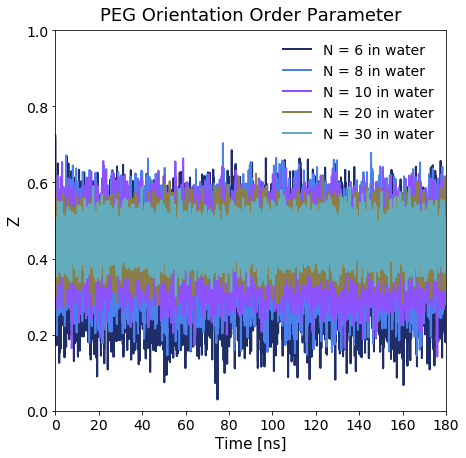

In [219]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Orientation Order Parameter', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'Z', fontsize=15)
plt.plot(trj_len/100, OOp_n6pegwat,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, OOp_n8pegwat,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, OOp_n10pegwat,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, OOp_n20pegwat,linewidth=2, color='#8B7F47')
plt.plot(trj_len/100, OOp_n30pegwat,linewidth=2, color='#63ACBE')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water','N = 20 in water','N = 30 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,1)

#### Mean Orientation Order Parameter for N = 30 PEG in water

In [220]:
np.mean(OOp_n30pegwat)

0.45068965316362847

In [221]:
np.std(OOp_n30pegwat)

0.03731261600483727

### Mean squared end to end distance 

In [222]:
eVec_n30pegwat, e2edis_n30pegwat = mean_sq_e2e(peg_n30, n30_peg_wat, n30_mon, start, end)

(0, 8)

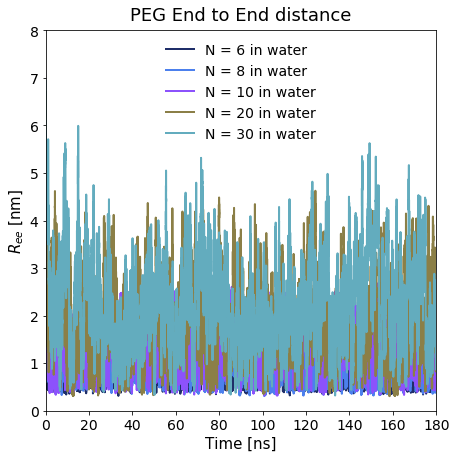

In [265]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG End to End distance', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{ee}$ [nm]', fontsize=15)
plt.plot(trj_len/100, e2edis_n6pegwat[1]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, e2edis_n8pegwat[1]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, e2edis_n10pegwat[1]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, e2edis_n20pegwat[1]/10,linewidth=2, color='#8B7F47')
plt.plot(trj_len/100, e2edis_n30pegwat[1]/10,linewidth=2, color='#63ACBE')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water','N = 20 in water','N = 30 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,8)

### Hydrodynamic Radius vs time

In [224]:
pegn30wat_rh = hydro_rad_poly(peg_n30, n30_peg_wat, n30_mon, start, end)

(0, 4)

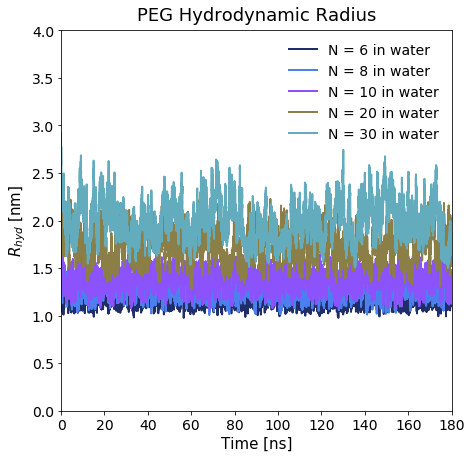

In [225]:
trj_len = np.arange(18000)
plt.figure(figsize=(7,7))
plt.title(r'PEG Hydrodynamic Radius', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{hyd}$ [nm]', fontsize=15)
plt.plot(trj_len/100, pegn6wat_rh/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, pegn8wat_rh/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, pegn10wat_rh/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, pegn20wat_rh/10,linewidth=2, color='#8B7F47')
plt.plot(trj_len/100, pegn30wat_rh/10,linewidth=2, color='#63ACBE')
plt.tick_params(labelsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water','N = 20 in water','N = 30 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0,4)

### Relaxation times vs monomer length 

In [ ]:
# Key variables 
# def pos_bead_autocorr_RA(polymer_atoms, universe, n_monomers, t_corr,  start, end):
n30_mon = 30
start = 0
end = 18000
t_corr = 2000
window_shift = 20

In [ ]:
s_time = timeit.default_timer()
tcRA_pegn30wat, tcSUM_pegn30wat = pos_bead_autocorr_RA(peg_n30, n30_peg_wat, n30_mon, t_corr, window_shift, start, end)
timeit.default_timer() - s_time

In [ ]:
tcRA_pegn30wat.shape

In [ ]:
tcSUM_pegn30wat.shape

### Fitting autocorrelation data 

In [ ]:
#np.save('n6pegWAT_Ct_RA.npy', tcRA_pegn6wat)
#np.save('n8pegWAT_Ct_RA.npy', tcRA_pegn8wat)
#np.save('n10pegWAT_Ct_RA.npy', tcRA_pegn10wat)
np.save('n20pegWAT_Ct_RA.npy', tcRA_pegn20wat)
np.save('n30pegWAT_Ct_RA.npy', tcRA_pegn30wat)

In [305]:
tcRA_pegn6wat = np.load('n6pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn8wat = np.load('n8pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn10wat = np.load('n10pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn20wat = np.load('n20pegWAT_Ct_RA.npy', allow_pickle=True)
tcRA_pegn30wat = np.load('n30pegWAT_Ct_RA.npy', allow_pickle=True)

In [307]:
xdata_pegn30wat = tcRA_pegn30wat[1]/100
ydata_pegn30wat = tcRA_pegn30wat[0]

In [ ]:
ydata_pegn30wat.shape

In [ ]:
xdata_pegn30wat.shape

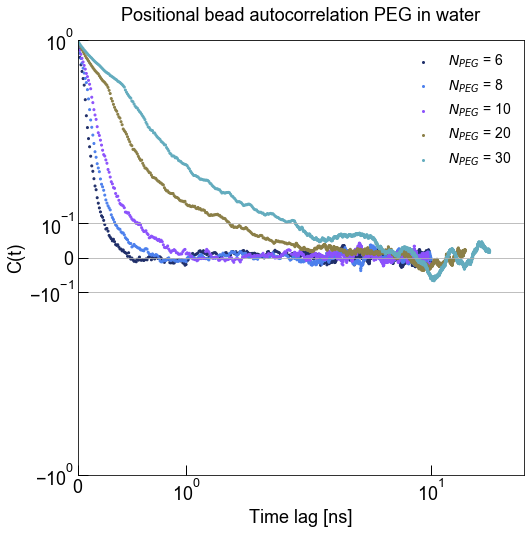

In [308]:
s_n30 =[4 for i in range(len(xdata_pegn30wat))]
plt.figure(figsize=(8,8))
plt.rcParams["font.family"] = "Arial"
plt.scatter(tcRA_pegn6wat[1]/100, tcRA_pegn6wat[0], color='#1F2E69', s=s_n30, label=r'$N_{PEG}$ = 6' )
plt.scatter(tcRA_pegn8wat[1]/100, tcRA_pegn8wat[0], color='#4C80ED', s=s_n30, label=r'$N_{PEG}$ = 8')
plt.scatter(tcRA_pegn10wat[1]/100, tcRA_pegn10wat[0], color='#8C52FC', s=s_n30, label=r'$N_{PEG}$ = 10')
plt.scatter(tcRA_pegn20wat[1]/100, tcRA_pegn20wat[0], color='#8B7F47', s=s_n30, label=r'$N_{PEG}$ = 20')
plt.scatter(tcRA_pegn30wat[1]/100, tcRA_pegn30wat[0], color='#63ACBE', s=s_n30, label=r'$N_{PEG}$ = 30')
plt.title(r'Positional bead autocorrelation PEG in water', fontsize=18, y=1.03)
plt.xlabel(r'Time lag [ns]', fontsize=18)
plt.ylabel('C(t)', fontsize=18)
plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('symlog', linthreshy=0.5)
plt.xscale('symlog')
plt.grid(b=True, axis='y')
plt.xlim(0,30)
plt.ylim(-1,1)
plt.tick_params(labelsize=18, direction='in', which='both', width=1, length=10)

### Radius of Gyration vs. time, N = 30 PEG/water

In [226]:
n30peg_rgens, cor_n30peg, N30peg_cos, rgavg_n30peg = get_rg_pers_poly(peg_n30, n30_peg_wat, 0, 18000)

In [227]:
n30peg_rgens[0].shape

(18000,)

In [ ]:
cor_n30peg[3]

In [ ]:
N30peg_cos

In [ ]:
rgavg_n30peg

In [ ]:
np.std(n30peg_rgens)

In [ ]:
np.save('n6peg_watRg.npy', n6peg_rgens[0])
np.save('n8peg_watRg.npy', n8peg_rgens[0])
np.save('n10peg_watRg.npy', n10peg_rgens[0])
np.save('n20peg_watRg.npy', n20peg_rgens[0])
np.save('n30peg_watRg.npy', n30peg_rgens[0])

(0.2, 3)

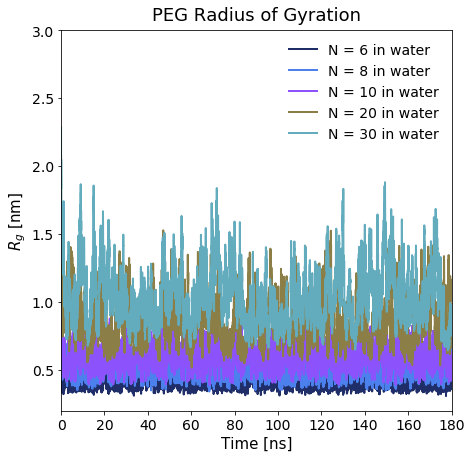

In [228]:
plt.figure(figsize=(7,7))
plt.title(r'PEG Radius of Gyration', fontsize=18, y=1.01)
plt.xlabel(r'Time [ns]', fontsize=15)
plt.ylabel(r'$R_{g}$ [nm]', fontsize=15)
plt.plot(trj_len/100, n6peg_rgens[0]/10,linewidth=2, color='#1F2E69')
plt.plot(trj_len/100, n8peg_rgens[0]/10,linewidth=2, color='#4C80ED')
plt.plot(trj_len/100, n10peg_rgens[0]/10,linewidth=2, color='#8C52FC')
plt.plot(trj_len/100, n20peg_rgens[0]/10,linewidth=2, color='#8B7F47')
plt.plot(trj_len/100, n30peg_rgens[0]/10,linewidth=2, color='#63ACBE')
plt.tick_params(labelsize=14)
#plt.legend(['N = 6 in water'], frameon=False, fontsize=14)
plt.legend(['N = 6 in water','N = 8 in water', 'N = 10 in water','N = 20 in water', 'N = 30 in water'], frameon=False, fontsize=14)
#plt.text(127, 0.96,r'N = 6 in water', fontsize=18, color='#1F2E69', family='Arial')
plt.xlim(0,180)
plt.ylim(0.2,3)

#### Get average COM distance from res 1 to res 2

In [229]:
com_bond_n30 = np.zeros(shape=(1,18000))
count = 0
for ts in n30_peg_wat.trajectory[0:18000]:
    n30_mon1 = n30_peg_wat.select_atoms("resid 1")
    n30_mon2 = n30_peg_wat.select_atoms("resid 2")
    oo_len = mda.analysis.distances.distance_array(n30_mon1.center_of_mass(), n30_mon2.center_of_mass(), 
                                                   box=n30_peg_wat.trajectory.ts.dimensions)
    com_bond_n30[0, count] = oo_len
    count += 1
    

In [230]:
np.mean(com_bond_n30)

3.244648195630251

In [231]:
np.std(com_bond_n30)

0.15149275281908156

In [232]:
lb_avg_pwn6

3.2416426844376756

In [233]:
lb_avg_pwn8

3.2432765017892087

In [234]:
lb_avg_pwn10

3.2415557268808546

In [235]:
lb_avg_pwn20 

3.2421872911182366

In [236]:
lb_avg_pwn30 = np.mean(com_bond_n30)


#### Correlation values at each arc length for the whole 180 ns trajectory

In [237]:
# x values
blen_n30 = cor_n30peg[3]*lb_avg_pwn30
#nt_tt[0] = 0
blen_n30

array([ 0.        ,  3.2446482 ,  6.48929639,  9.73394459, 12.97859278,
       16.22324098, 19.46788917, 22.71253737, 25.95718557, 29.20183376,
       32.44648196, 35.69113015, 38.93577835, 42.18042654, 45.42507474,
       48.66972293, 51.91437113, 55.15901933, 58.40366752, 61.64831572,
       64.89296391, 68.13761211, 71.3822603 , 74.6269085 , 77.8715567 ,
       81.11620489, 84.36085309, 87.60550128, 90.85014948])

In [238]:
mk_n30p = cor_n30peg[1]/cor_n30peg[0]
mk_n30p

array([1.65502277e-18, 1.12510297e-02, 4.20227991e-02, 9.54269549e-02,
       1.54121112e-01, 2.05329307e-01, 2.55763448e-01, 3.06237477e-01,
       3.56357881e-01, 4.09166388e-01, 4.66524178e-01, 5.25922234e-01,
       5.94213787e-01, 6.64286958e-01, 7.30875321e-01, 8.06134549e-01,
       9.02918502e-01, 1.00643776e+00, 1.11150274e+00, 1.22109693e+00,
       1.34064752e+00, 1.44923231e+00, 1.54351984e+00, 1.68132529e+00,
       1.84229604e+00, 2.01474267e+00, 2.20415060e+00, 2.46460856e+00,
       2.63403552e+00])

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30, np.log(cor_n30peg[0]), yerr=mk_n30p, color='#63ACBE', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.legend(['N = 6 in water','N = 8 in water','N = 10 in water', 'N = 20 in water', 'N = 30 in water'], frameon=False, fontsize=14)

In [240]:
# All the points give the best fits for N = 10 peg in water, first 6 points 
n30_blkspeg , n30peg_fitslp = bavg_pers_cnt(5, peg_n30, n30_peg_wat, lb_avg_pwn30, 6, 0 , 18000)

0
3600
Lp [Angstroms]: 19.7136388021302
Error in Lp from fit [Angstroms], 95% CL : 0.1281239801802247
R2 score: 0.988130142851702
3600
7200
Lp [Angstroms]: 19.30106249846325
Error in Lp from fit [Angstroms], 95% CL : 0.12198000376605692
R2 score: 0.9888582598423631
7200
10800
Lp [Angstroms]: 18.483128168243745
Error in Lp from fit [Angstroms], 95% CL : 0.11882279719255816
R2 score: 0.9887771637314419
10800
14400
Lp [Angstroms]: 19.297014834053808
Error in Lp from fit [Angstroms], 95% CL : 0.12158781740649234
R2 score: 0.9890011267790987
14400
18000
Lp [Angstroms]: 19.395700026040384
Error in Lp from fit [Angstroms], 95% CL : 0.12066628490077858
R2 score: 0.9891990793841653
0
3600
3600
7200
7200
10800
10800
14400
14400
18000


In [241]:
n30_blkspeg

{'Avg Hydrodynamic radius': array([19.913754665146396, 19.890066811405795, 19.096866025962306,
        19.797082151856852, 19.933389656508346], dtype=object),
 'Avg Radius of gyration': array([10.8740856 , 10.61859837,  9.9988651 , 10.48136917, 10.92449797]),
 'Avg Sq. radius of gyration': array([118.24573772, 112.75463131,  99.97730323, 109.85909972,
        119.34465594]),
 'Avg end to end distance': array([25.62025968, 23.35523802, 21.87729712, 23.56650726, 26.98946556]),
 'Avg Sq. end to end distance': array([656.39770603, 545.46714291, 478.61612913, 555.38026456,
        728.43125147]),
 'Avg persistence length': array([19.7136388 , 19.3010625 , 18.48312817, 19.29701483, 19.39570003])}

In [242]:
n30peg_fitslp

array([[ 1.97136388e+01,  1.93010625e+01,  1.84831282e+01,
         1.92970148e+01,  1.93957000e+01],
       [ 1.28123980e-01,  1.21980004e-01,  1.18822797e-01,
         1.21587817e-01,  1.20666285e-01],
       [-5.07263022e-02, -5.18106192e-02, -5.41033959e-02,
        -5.18214868e-02, -5.15578194e-02],
       [ 1.01566983e-03,  1.00186985e-03,  1.13046347e-03,
         9.96273300e-04,  9.61410670e-04]])

In [ ]:
n30peg_fitslp[2]

In [ ]:
np.mean(n30peg_fitslp[3])

#### line fitted to cosine theta values using mean slope

In [243]:
blen_n30

array([ 0.        ,  3.2446482 ,  6.48929639,  9.73394459, 12.97859278,
       16.22324098, 19.46788917, 22.71253737, 25.95718557, 29.20183376,
       32.44648196, 35.69113015, 38.93577835, 42.18042654, 45.42507474,
       48.66972293, 51.91437113, 55.15901933, 58.40366752, 61.64831572,
       64.89296391, 68.13761211, 71.3822603 , 74.6269085 , 77.8715567 ,
       81.11620489, 84.36085309, 87.60550128, 90.85014948])

In [244]:
gg_n6peg_n30 = line_fit(np.mean(n6peg_fitslp[2]),blen_n30)
gg_n6peg_n30

array([-0.        , -0.21017305, -0.42034611, -0.63051916, -0.84069221,
       -1.05086527, -1.26103832, -1.47121137, -1.68138442, -1.89155748,
       -2.10173053, -2.31190358, -2.52207664, -2.73224969, -2.94242274,
       -3.1525958 , -3.36276885, -3.5729419 , -3.78311495, -3.99328801,
       -4.20346106, -4.41363411, -4.62380717, -4.83398022, -5.04415327,
       -5.25432633, -5.46449938, -5.67467243, -5.88484548])

In [245]:
gg_n8peg_n30 = line_fit(np.mean(n8peg_fitslp[2]),blen_n30)
gg_n8peg_n30

array([-0.        , -0.18371254, -0.36742509, -0.55113763, -0.73485017,
       -0.91856271, -1.10227526, -1.2859878 , -1.46970034, -1.65341288,
       -1.83712543, -2.02083797, -2.20455051, -2.38826305, -2.5719756 ,
       -2.75568814, -2.93940068, -3.12311322, -3.30682577, -3.49053831,
       -3.67425085, -3.85796339, -4.04167594, -4.22538848, -4.40910102,
       -4.59281356, -4.77652611, -4.96023865, -5.14395119])

In [246]:
gg_n10peg_n30 = line_fit(np.mean(n10peg_fitslp[2]),blen_n30)
gg_n10peg_n30

array([-0.        , -0.17083358, -0.34166717, -0.51250075, -0.68333434,
       -0.85416792, -1.02500151, -1.19583509, -1.36666868, -1.53750226,
       -1.70833585, -1.87916943, -2.05000302, -2.2208366 , -2.39167019,
       -2.56250377, -2.73333736, -2.90417094, -3.07500453, -3.24583811,
       -3.4166717 , -3.58750528, -3.75833887, -3.92917245, -4.10000604,
       -4.27083962, -4.44167321, -4.61250679, -4.78334038])

In [247]:
gg_n20peg_n30 = line_fit(np.mean(n20peg_fitslp[2]),blen_n30)
gg_n20peg_n30

array([-0.        , -0.17107417, -0.34214835, -0.51322252, -0.6842967 ,
       -0.85537087, -1.02644505, -1.19751922, -1.3685934 , -1.53966757,
       -1.71074174, -1.88181592, -2.05289009, -2.22396427, -2.39503844,
       -2.56611262, -2.73718679, -2.90826097, -3.07933514, -3.25040931,
       -3.42148349, -3.59255766, -3.76363184, -3.93470601, -4.10578019,
       -4.27685436, -4.44792854, -4.61900271, -4.79007689])

In [248]:
gg_n30peg = line_fit(np.mean(n20peg_fitslp[2]),blen_n30)

### Block averaged Rg, Ree, Rh, mean sq. Ree and mean sq. Rg persistence length, N = 30 PEG/water

In [273]:
# Contour Length, N = 10 PEG in DMSO
lc_n30pw = lb_avg_pwn30*(n30_mon-1)
lc_n30pw

94.09479767327727

#### Mean sq. e2e/Mean sq. Rg vs contour length PEG/water

In [274]:
# Ree^2/Rg^2 array at different contour lengths
ree_rhyd_pegwat[1,4] = lc_n30pw
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  5.79712764,  5.54005155,  5.29166507],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853, 94.09479767]])

In [296]:
a_n30 = np.mean(n30_blkspeg['Avg Sq. end to end distance'])
a_n30

592.8584988214242

In [276]:
b_n30 = np.mean(n30_blkspeg['Avg Sq. radius of gyration'])

In [277]:
ree_rhyd_pegwat[0,4] = a_n30/b_n30
ree_rhyd_pegwat

array([[ 5.3091863 ,  5.59342039,  5.79712764,  5.54005155,  5.29166507],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853, 94.09479767]])

In [301]:
np.save('PEGwat_msRee_msRg.npy', ree_rhyd_pegwat)

(5, 7)

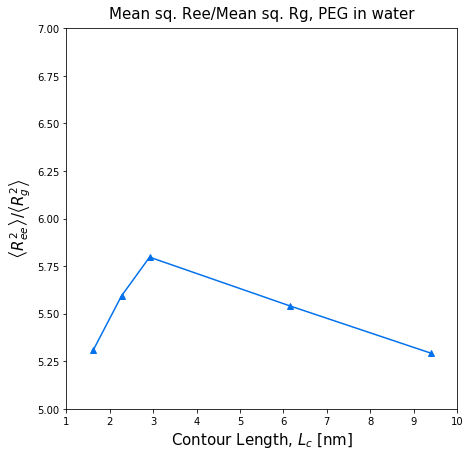

In [279]:
plt.figure(figsize=(7,7))
plt.plot(ree_rhyd_pegwat[1]/10, ree_rhyd_pegwat[0], color='#0371EC',marker='^')
plt.title('Mean sq. Ree/Mean sq. Rg, PEG in water', fontsize=15, y=1.01)
plt.xlabel(r'Contour Length, $L_{c}$ [nm]', fontsize=15)
plt.ylabel(r'$\left<R_{ee}^{2}\right>/\left<R_{g}^{2}\right>$', fontsize=15)
plt.xlim(1,10)
plt.ylim(5,7)

#### Rg/Rh vs contour length PEG/water

In [280]:
# Rg/Rh array at different contour lengths 
rhy_rg_pegwat[1,4] = lc_n30pw
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.4439264 ,  0.51388612,  0.53631547],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853, 94.09479767]])

In [281]:
aa_n30 = np.mean(n30_blkspeg['Avg Radius of gyration'])

In [282]:
bb_n30 = np.mean(n30_blkspeg['Avg Hydrodynamic radius'])

In [283]:
rhy_rg_pegwat[0,4] = aa_n30/bb_n30
rhy_rg_pegwat

array([[ 0.3681453 ,  0.41206399,  0.4439264 ,  0.51388612,  0.53631547],
       [16.20821342, 22.70293551, 29.17400154, 61.60155853, 94.09479767]])

In [284]:
np.save('PEGwat_RgRh_Lc.npy', rhy_rg_pegwat)

(0.3, 0.6)

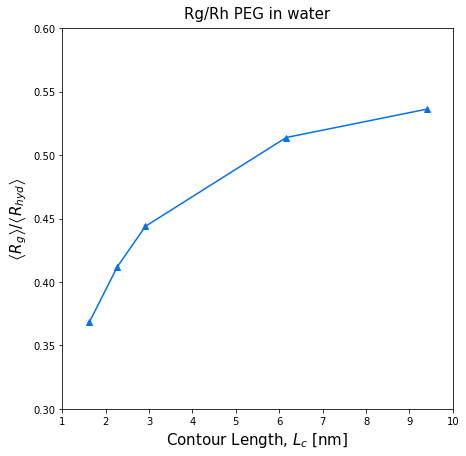

In [285]:
plt.figure(figsize=(7,7))
plt.plot(rhy_rg_pegwat[1]/10, rhy_rg_pegwat[0], color='#0371EC',marker='^')
plt.title(r'Rg/Rh PEG in water', fontsize=15, y=1.01)
plt.xlabel(r'Contour Length, $L_{c}$ [nm]', fontsize=15)
plt.ylabel(r'$\left<R_{g}\right>/\left<R_{hyd}\right>$', fontsize=15)
plt.xlim(1,10)
plt.ylim(0.3,0.6)

### Lp/L and kuhn lenght vs monomer length

In [289]:
kuhnlpL_pegwat[0,4] = a_n30/lc_n30pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  7.46844157,  6.99627541,  6.30065119],
       [ 0.95458974,  0.77915495,  0.65167913,  0.30800962,  0.20445454],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

In [290]:
# pers length/contour length 
kuhnlpL_pegwat[1,4] = np.mean(n30_blkspeg["Avg persistence length"])/lc_n30pw
kuhnlpL_pegwat

array([[ 6.49790562,  6.9870614 ,  7.46844157,  6.99627541,  6.30065119],
       [ 0.95458974,  0.77915495,  0.65167913,  0.30800962,  0.20445454],
       [ 6.        ,  8.        , 10.        , 20.        , 30.        ]])

In [291]:
np.mean(n30_blkspeg["Avg persistence length"])/lc_n30pw

0.20445454309372366

In [293]:
np.save('PEGwater_lk_LpL.npy', kuhnlpL_pegwat)

(5, 35)

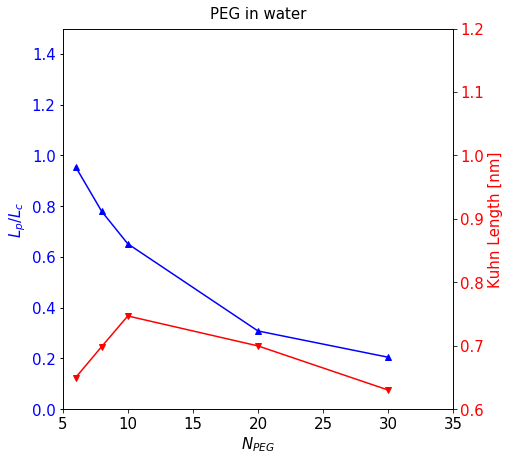

In [304]:
fig, ax1 = plt.subplots(figsize=(7,7))
plt.title(r'PEG in water', fontsize=15, y=1.01)

ax1.set_xlabel(r'$N_{PEG}$', fontsize=15)
ax1.set_ylabel(r'$L_{p}/L_{c}$', color='b', fontsize=15)
ax1.plot(kuhnlpL_pegwat[2], kuhnlpL_pegwat[1], color='b',marker='^')
ax1.tick_params(axis='y', labelcolor='b', labelsize=15, width=1)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylim(0,1.5)
ax1.set_xlim(5,35)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Kuhn Length [nm]', color='r', fontsize=15)  # we already handled the x-label with ax1
ax2.plot(kuhnlpL_pegwat[2], kuhnlpL_pegwat[0]/10, color='r', marker='v')
ax2.tick_params(axis='y', labelcolor='r', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.set_ylim(0.6,1.2)
ax2.set_xlim(5,35)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()

### Block averaged Radius of gyration and persistence length, N = 30 PEG/water

In [297]:
np.mean(n30_blkspeg["Avg persistence length"])

19.238108865786277

In [298]:
np.std(n30_blkspeg["Avg persistence length"])

0.40703626884494215

In [299]:
np.mean(n30_blkspeg["Avg Radius of gyration"])

10.579483242625425

In [300]:
np.std(n30_blkspeg["Avg Radius of gyration"])

0.3328962328902261

In [ ]:
blen_n30[:10]

In [ ]:
rgpeg_olig

In [ ]:
#rgpeg_olig.to_pickle("./PEG_water_Rg.pkl") 

In [ ]:
rgpeg_olig[r"$R_{g}$ [Angstrom] N = 30 PEG "] = n30_blkspeg["Avg Radius of gyration"]
rgpeg_olig

In [ ]:
pers_pegt[r"$L_{p}$ [Angstrom] N = 30 PEG "] = n30_blkspeg["Avg persistence length"]
pers_pegt

In [ ]:
pers_pegt

In [ ]:
#pers_pegt.to_pickle("PEG_water_Lp.pkl")

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(blen, np.log(cor_n6peg[0]), yerr=mk_n6p, color='#1F2E69', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n8, np.log(cor_n8peg[0]), yerr=mk_n8p, color='#4C80ED', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n10, np.log(cor_n10peg[0]), yerr=mk_n10p, color='#8C52FC', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n20, np.log(cor_n20peg[0]), yerr=mk_n20p, color='#8B7F47', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.errorbar(blen_n30, np.log(cor_n30peg[0]), yerr=mk_n30p, color='#63ACBE', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(blen_n30[:15], gg_n6peg_n30[:15], color='#1F2E69')
plt.plot(blen_n30[:15], gg_n8peg_n30[:15], color='#4C80ED')
plt.plot(blen_n30[:15], gg_n10peg_n30[:15], color='#8C52FC')
plt.plot(blen_n30[:15], gg_n20peg_n30[:15], color='#8B7F47')
plt.plot(blen_n30[:15], gg_n30peg[:15], color='#63ACBE')
plt.title(r'Ensemble Averaged ln(Cosine $\theta$)', fontsize=15, y=1.01)
plt.xlabel(r'Bond Length', fontsize=15)
plt.ylabel(r'ln$\left< Cos(\theta)\right >$', fontsize=15)
plt.ylim(-6,1)
plt.xlim(0,90)
font = font_manager.FontProperties(family='Arial', style='normal', size='14')
plt.text(0.5, -5.9,r'$N_{PEG}$ = 6: $L_{p}$ = 15.7 $\AA$ ± 1.27 $\AA$', fontsize=15, color='#1F2E69')
plt.text(0.5,-5.58,r'$N_{PEG}$ = 8: $L_{p}$ = 17.5 $\AA$ ± 0.50 $\AA$', fontsize=15, color='#4C80ED')
plt.text(0.5,-5.23,r'$N_{PEG}$ = 10: $L_{p}$ = 19.1 $\AA$ ± 0.56 $\AA$', fontsize=15, color='#8C52FC')
plt.text(0.5,-4.90,r'$N_{PEG}$ = 20: $L_{p}$ = 18.9 $\AA$ ± 0.28 $\AA$', fontsize=15, color='#8B7F47')
plt.text(0.5,-4.50,r'$N_{PEG}$ = 30: $L_{p}$ = 19.1 $\AA$ ± 0.46 $\AA$', fontsize=15, color='#63ACBE')
plt.tick_params(labelsize=14)

### Fluory Exponent, PEG/water systems 

In [ ]:
n_peg = np.array([6,8,10,20,30])
rg_npeg = np.array([np.mean(n6_blkspeg["Avg Radius of gyration"])
                    ,np.mean(n8_blkspeg["Avg Radius of gyration"]),np.mean(n10_blkspeg["Avg Radius of gyration"])
                    ,np.mean(n20_blkspeg["Avg Radius of gyration"]),np.mean(n30_blkspeg["Avg Radius of gyration"])])

In [ ]:
rg_npeg_std = np.array([np.std(np.log10(n6_blkspeg["Avg Radius of gyration"]))
                    ,np.std(np.log10(n8_blkspeg["Avg Radius of gyration"])),np.std(np.log10(n10_blkspeg["Avg Radius of gyration"]))
                    ,np.std(np.log10(n20_blkspeg["Avg Radius of gyration"])),np.std(np.log10(n30_blkspeg["Avg Radius of gyration"]))])

In [ ]:
n6_blkspeg["Avg Radius of gyration"]

In [ ]:
np.log10(n6_blkspeg["Avg Radius of gyration"])

In [ ]:
rg_npeg_std

In [ ]:
np.log10(rg_npeg_std)

In [ ]:
rg_npeg

In [ ]:
n_peg

In [ ]:
np.log10(rg_npeg)

In [ ]:
np.log10(n_peg)

In [ ]:
# From fitting all points, I get best fit 
from sklearn.linear_model import LinearRegression
model_v = LinearRegression(fit_intercept=True)
model_v.fit(np.log10(n_peg).reshape(-1,1), np.log10(rg_npeg))
# Slope here is in nanometers
print("Model slope:    ", model_v.coef_[0])
print("Model intercept:", model_v.intercept_)

In [ ]:
gg = model_v.predict(np.log10(n_peg.reshape(-1,1)))
gg

In [ ]:
print("Mean Std Error:", sklearn.metrics.mean_squared_error(np.log10(rg_npeg), gg))
print("R2 score:", sklearn.metrics.r2_score(np.log10(rg_npeg), gg))

In [ ]:
# Residuals between the true y data and model y data 
resid_v = np.log10(rg_npeg) - gg
resid_v

In [ ]:
# How to calculate Sum((Xi - avg(X))^2): X values are the bond length values 
nt_tt = np.log10(n_peg)
nt_tt -= np.mean(nt_tt)
nhui = nt_tt**2
np.sum(nhui)

In [ ]:
# t-value with 95 % confidence intervals 
scipy.stats.t.ppf(0.975, 4)

In [ ]:
# How to calculate 95% confidence interval for the slope 
flc_v = scipy.stats.t.ppf(0.975, 4)*np.sqrt((np.sum(resid_v**2)/len(resid_v))/(np.sum(nhui)))
flc_v

In [ ]:
plt.figure(figsize=(7,7))
plt.errorbar(np.log10(n_peg), np.log10(rg_npeg), yerr=rg_npeg_std, color='#A95AA1', linestyle="None",marker='o',
     capsize=5, capthick=1, ecolor='black')
plt.plot(np.log10(n_peg), gg, color='#A95AA1')
plt.title(r'Fluory Exponent', fontsize=15)
plt.xlabel(r'Log($N_{PEG}$)', fontsize=15)
plt.ylabel(r'Log($R_{g}$)', fontsize=15)
plt.tick_params(labelsize=14)
plt.text(1.1, 0.80, r'$v_{water}$ = 0.52 ± 0.04', fontsize=15, color='#A95AA1')